## This is a model where we will predict a football players's value with some given features from the dataset with the use of Artificial Neural Network

IMPORTING PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

IMPORTING AND CHECKING THE DATA FRAMES

In [2]:
df=pd.read_csv('football data.csv',index_col=0)

In [3]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#This is important to check how many unique features are there in you data input (here in form of descending order)

In [4]:
df.nunique().sort_values(ascending=False)

ID                          18207
Photo                       18207
Name                        17194
Joined                       1736
Special                      1422
                            ...  
Weak Foot                       5
International Reputation        5
Skill Moves                     5
Preferred Foot                  2
Real Face                       2
Length: 88, dtype: int64

In [5]:
df.columns.nunique()

88

In [6]:
len(df)

18207

CHECKING FOR ANY MISSING DATA . For training a model there should  not be any feature left behind

In [5]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

In [6]:
100* df.isnull().sum()/len(df)

ID                0.000000
Name              0.000000
Age               0.000000
Photo             0.000000
Nationality       0.000000
                    ...   
GKHandling        0.263635
GKKicking         0.263635
GKPositioning     0.263635
GKReflexes        0.263635
Release Clause    8.590103
Length: 88, dtype: float64

In [7]:
df.isnull().nunique().sum()

164

Now checking for columns and extracting important ones from them

In [8]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

FILLING THE MISSING VALUES WITH THEIR MEAN MOR MEDIANS

In [10]:
df['Weight']

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

Using important features and filling their missing values either by their mean or median (as per model's convenience)

In [11]:
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'], inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Weight'].fillna('165lbs', inplace = True)
df['Contract Valid Until'].fillna(2019, inplace = True)
df['Height'].fillna("5'11", inplace = True)
df['Loaned From'].fillna('None', inplace = True)
df['Joined'].fillna('Jul 1, 2018', inplace = True)
df['Jersey Number'].fillna(8, inplace = True)
df['Body Type'].fillna('Normal', inplace = True)
df['Position'].fillna('ST', inplace = True)
df['Club'].fillna('No Club', inplace = True)
df['Work Rate'].fillna('Medium/ Medium', inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)
df['Weak Foot'].fillna(3, inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Wage'].fillna('€200K', inplace = True)

In [12]:
df.isnull().nunique().sum()

141

In [13]:
df.fillna(0, inplace = True)

REPLACING THE STRING TO REQUIRED NUMERICAL VALUE FOR GETTING USE OF MORE COLUMNS 

In [14]:
df['Weight'].describe()

count      18207
unique        57
top       165lbs
freq        1531
Name: Weight, dtype: object

In [15]:

def extract_value_from(value):
  out = value.replace('lbs', '')
  return float(out)

df['Weight'] = df['Weight'].apply(lambda x : extract_value_from(x))

df['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [16]:
df['Weight'].mean()

165.97654748173778

In [17]:
def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

In [18]:
df['Value'] = df['Value'].apply(lambda x: extract_value_from(x))
df['Wage'] = df['Wage'].apply(lambda x: extract_value_from(x))


df['Wage'].head()


0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

# SELECTING IMPORTANT COLUMNS OF DATASET

In [19]:
selected_columns = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']

In [20]:
df_selected = pd.DataFrame(df, columns = selected_columns)
df_selected.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Height', 'Weight', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [21]:
df_selected.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [22]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      18207 non-null  object 
 6   Value                     18207 non-null  float64
 7   Wage                      18207 non-null  float64
 8   Special                   18207 non-null  int64  
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18207 non-null  float64
 11  Weak Foot                 18207 non-null  float64
 12  Skill Moves               18207 non-null  float64
 13  Work Rate                 18207 non-null  object 
 14  Body T

In [23]:
df_selected.describe()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Weight,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,...,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299,2.410696e+06,9731.312133,1597.809908,1.112924,2.947438,2.360356,165.976547,...,48.420607,58.493656,47.156973,47.572088,45.541056,16.572417,16.348382,16.189268,16.345691,16.666831
std,4.669943,6.908930,6.136496,5.594933e+06,21999.290406,272.586016,0.393554,0.659591,0.755394,15.572856,...,15.879699,11.810375,20.025458,21.773243,21.389596,17.692536,16.905507,16.502101,17.032944,17.951898
min,16.000000,46.000000,48.000000,0.000000e+00,0.000000,731.000000,1.000000,1.000000,1.000000,110.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,3.000000e+05,1000.000000,1457.000000,1.000000,3.000000,2.000000,154.000000,...,39.000000,51.000000,30.000000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,6.750000e+05,3000.000000,1635.000000,1.000000,3.000000,2.000000,165.000000,...,49.000000,59.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,2.000000e+06,9000.000000,1787.000000,1.000000,3.000000,3.000000,176.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,1.185000e+08,565000.000000,2346.000000,5.000000,5.000000,5.000000,243.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


# CHECKING FOR SIMILAR CORELATED COLUMNS 

(10.0, 0.0)

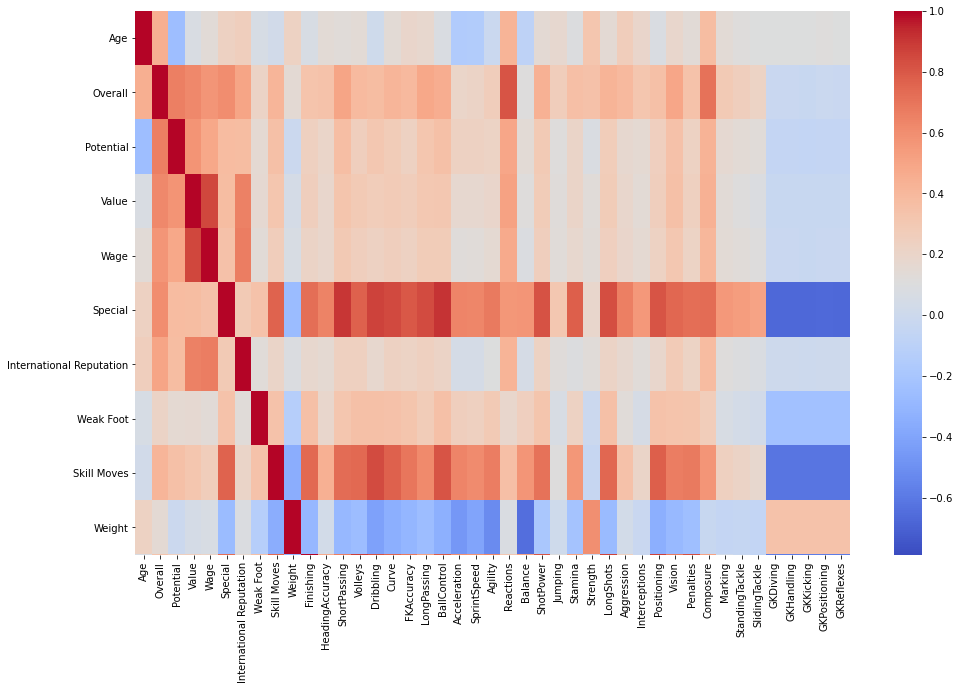

In [24]:
plt.figure(figsize=(16,10))
sns.heatmap(df_selected.corr(),cmap='coolwarm')
plt.ylim(10, 0)

Using various visualization libraries to see the corelation between the wages

<AxesSubplot:xlabel='Value', ylabel='Wage'>

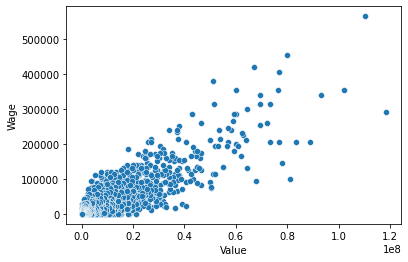

In [25]:
sns.scatterplot(x='Value',y='Wage',data=df_selected)

 SOME MORE FEATURE ENGINEERING WITH HIGHLY CORRELATED COLUMNS 
    CONVERTING THEM TO FLOAT DATA TYPE

In [26]:
df_selected['Club'].head()

0           FC Barcelona
1               Juventus
2    Paris Saint-Germain
3      Manchester United
4        Manchester City
Name: Club, dtype: object

<AxesSubplot:xlabel='Age', ylabel='Wage'>

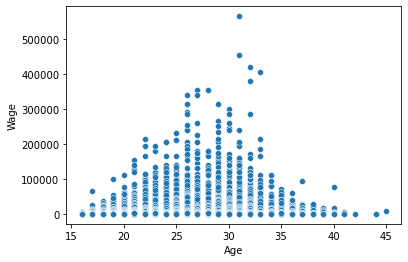

In [27]:
sns.scatterplot(x='Age',y='Wage',data=df_selected)

In [28]:
df_selected['Position'].nunique()

27

# Position was highly corelated with value so replacing their string values to numerical so that they can be used in training model

In [29]:
forward = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]

In [30]:
df_selected.loc[df["Position"] == "GK", "Position"] = 0.0
df_selected.loc[df["Position"].isin(defender), "Position"] = 1.0
df_selected.loc[df["Position"].isin(midfielder), "Position"] = 2.0
df_selected.loc[df["Position"].isin(forward), "Position"] = 3.0

C:\Users\91966\anaconda3\envs\gputest\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Position'>

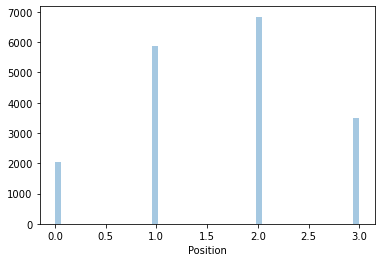

In [31]:
sns.distplot(df_selected['Position'],bins=50,kde=False)

In [32]:
df_selected["Position"].value_counts()


2.0    6838
1.0    5866
3.0    3478
0.0    2025
Name: Position, dtype: int64

<AxesSubplot:xlabel='Position', ylabel='Wage'>

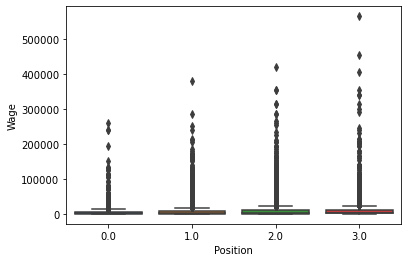

In [33]:
sns.boxplot(x='Position',data=df_selected,y='Wage')

In [34]:
df_selected['Height'].head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

In [35]:
def hconversion(value):
        height = value.split("'")
        feet=int(height[0])
        inches=int(height[1])
        metre=((12*feet)+inches)*0.0254
        return metre
  

In [36]:
df_selected['Height'] = df_selected['Height'].apply(lambda x : hconversion(x))

In [37]:
df_selected['Height'].head()

0    1.7018
1    1.8796
2    1.7526
3    1.9304
4    1.8034
Name: Height, dtype: float64

<AxesSubplot:xlabel='Position', ylabel='Value'>

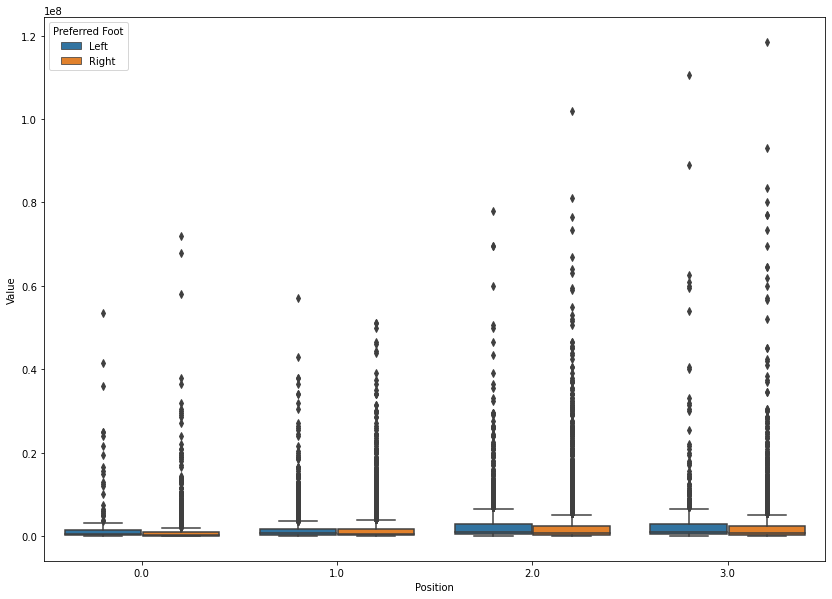

In [38]:
plt.figure(figsize=(14,10))
sns.boxplot(x='Position',y='Value',data=df_selected,hue='Preferred Foot')

   THOUGHT OF SPLITTING THE WORK RATE AND ASSIGNING THEM SOME VALUE BUT FAILED TO DO SO

In [39]:
##df_selected['Work Rate'].head()

ADJUSTING SOME MORE COLUMNS

In [40]:
def extract_value_from(Value):
    Value=str(Value)
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

In [41]:
df_selected['Release Clause'] = df_selected['Release Clause'].apply(lambda x: extract_value_from(x))

In [42]:
df_selected['Release Clause'].head()

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: float64

C:\Users\91966\anaconda3\envs\gputest\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

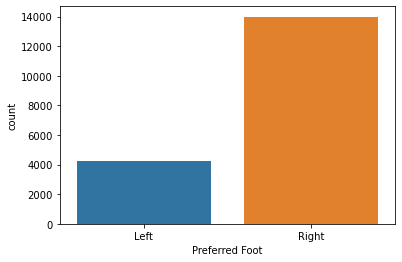

In [43]:
sns.countplot(df_selected['Preferred Foot'])

#replacing string values to dummies which will be helpful and easy

In [47]:
foot=pd.get_dummies(df_selected['Preferred Foot'],drop_first=True)

In [48]:
foot

,Right
0,0
1,1
2,1
3,1
4,1
...,...
18202,1
18203,1
18204,1
18205,1


In [49]:
df_selected=pd.concat([df_selected,foot],axis=1)

In [50]:
df_selected=df_selected.drop(['Preferred Foot','Name','Nationality','Club'],axis=1)

In [51]:
df_selected.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Right,Right
0,31,94,94,110500000.0,565000.0,2202,5.0,4.0,4.0,Medium/ Medium,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,0,0
1,33,94,94,77000000.0,405000.0,2228,5.0,4.0,5.0,High/ Low,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,1,1
2,26,92,93,118500000.0,290000.0,2143,5.0,5.0,5.0,High/ Medium,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,1,1
3,27,91,93,72000000.0,260000.0,1471,4.0,3.0,1.0,Medium/ Medium,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,1,1
4,27,91,92,102000000.0,355000.0,2281,4.0,5.0,4.0,High/ High,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,1,1


# CHECKING AND REMOVING THE PLAYERS WITH 0 VALUES

This is done because some players had good features but still not got selected for the upcoming year (exceptional features cases can cause difficult for model)

In [52]:
df_selected['Value'].sort_values(ascending=True)

538              0.0
6679             0.0
11919            0.0
8273             0.0
8296             0.0
            ...     
15        89000000.0
5         93000000.0
4        102000000.0
0        110500000.0
2        118500000.0
Name: Value, Length: 18207, dtype: float64

In [53]:
c=df_selected[df_selected['Value']>0]

In [54]:
c['Value'].mean()

2444530.2144249515

# TRAINING AND TESTING THE MODEL

Droping body type and workrate (not important features)

In [60]:
c=c.drop(['Body Type','Work Rate'],axis=1)

In [57]:
X=c.drop('Value',axis=1).values
y=c['Value'].values

Splitting the model using train test split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)

Scaling the features is necessary as it gives our model a lesser loss in validation and training

In [64]:

from sklearn.preprocessing import StandardScaler


scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Importing neural network models from tensorflow

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Checking the shape is important (both target and training data should have equal rows)

In [67]:
X_train.shape

(12029, 47)

In [68]:
y_train.shape

(12029,)

# Constructing the neural network 6 layers and 1 output layer(for value)
6 layers is because of data size (more datasize=more neural layers)

In [69]:
model=Sequential()
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='softplus'))
        
model.compile(optimizer='adam',loss= 'msle')

TRAINED THE MODEL(epochs=400 for minimizing the losses and batch_size=128 to distribute data in batches)

In [70]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          batch_size=128,
          validation_data=(X_test, y_test), 
          )

Epoch 1/400
94/94 [==============================] - 1s 11ms/step - loss: 64.8457 - val_loss: 23.6412
Epoch 2/400
94/94 [==============================] - 1s 8ms/step - loss: 14.1900 - val_loss: 8.0635
Epoch 3/400
94/94 [==============================] - 1s 8ms/step - loss: 5.4874 - val_loss: 3.5979
Epoch 4/400
94/94 [==============================] - 1s 8ms/step - loss: 2.6878 - val_loss: 1.9748
Epoch 5/400
94/94 [==============================] - 1s 8ms/step - loss: 1.6282 - val_loss: 1.3368
Epoch 6/400
94/94 [==============================] - 1s 8ms/step - loss: 1.1896 - val_loss: 1.0457
Epoch 7/400
94/94 [==============================] - 1s 9ms/step - loss: 0.9632 - val_loss: 0.8742
Epoch 8/400
94/94 [==============================] - 1s 9ms/step - loss: 0.8202 - val_loss: 0.7578
Epoch 9/400
94/94 [==============================] - 1s 9ms/step - loss: 0.7168 - val_loss: 0.6671
Epoch 10/400
94/94 [==============================] - 1s 8ms/step - loss: 0.6341 - val_loss: 0.5926
Epoch

Epoch 83/400
94/94 [==============================] - 0s 2ms/step - loss: 0.0217 - val_loss: 0.0271
Epoch 84/400
94/94 [==============================] - 0s 2ms/step - loss: 0.0213 - val_loss: 0.0274
Epoch 85/400
94/94 [==============================] - 0s 2ms/step - loss: 0.0208 - val_loss: 0.0269
Epoch 86/400
94/94 [==============================] - 0s 2ms/step - loss: 0.0203 - val_loss: 0.0264
Epoch 87/400
94/94 [==============================] - 0s 2ms/step - loss: 0.0200 - val_loss: 0.0263
Epoch 88/400
94/94 [==============================] - 0s 2ms/step - loss: 0.0197 - val_loss: 0.0256
Epoch 89/400
94/94 [==============================] - 0s 2ms/step - loss: 0.0194 - val_loss: 0.0254
Epoch 90/400
94/94 [==============================] - 0s 2ms/step - loss: 0.0188 - val_loss: 0.0261
Epoch 91/400
94/94 [==============================] - 0s 2ms/step - loss: 0.0188 - val_loss: 0.0246
Epoch 92/400
94/94 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.0248


94/94 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0110
Epoch 246/400
94/94 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0119
Epoch 247/400
94/94 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0115
Epoch 248/400
94/94 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0113
Epoch 249/400
94/94 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0114
Epoch 250/400
94/94 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0121
Epoch 251/400
94/94 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0108
Epoch 252/400
94/94 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0111
Epoch 253/400
94/94 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0113
Epoch 254/400
94/94 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0112
Epoc

PLotting the model losses 

<AxesSubplot:>

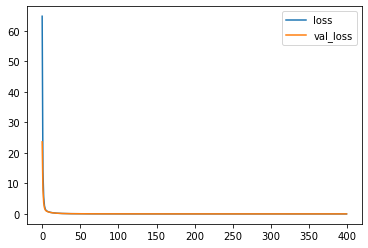

In [71]:
losses=pd.DataFrame(model.history.history)
losses.plot()